In [1]:
import pandas as pd

from IPython.core.debugger import Pdb
ipdb = Pdb()

from model import init_utils
from model import processing
# Experiments
from model import run
from model.plot_utils import *

########## AGENT CONFIGURATION ##########
# key -> token name, value -> token amount owned by agent
# note that token name of 'omniABC' is used for omnipool LP shares of token 'ABC'
# omniHDXABC is HDX shares dedicated to pool of token ABC

trader = {'HDX': 1000000, 'R1': 1000000, 'R2': 1000000}
LP1 = {'omniR1': 500000}
LP2 = {'omniR2': 1500000}

# key -> agent_id, value -> agent dict
agent_d = {'Trader': trader, 'LP1': LP1}

########## ACTION CONFIGURATION ##########

action_dict = {
    'sell_r2_for_r1': {'token_buy': 'R1', 'token_sell': 'R2', 'amount_sell': 5000, 'action_id': 'Trade',
                       'agent_id': 'Trader'},
    'sell_r1_for_r2': {'token_sell': 'R1', 'token_buy': 'R2', 'amount_sell': 1000, 'action_id': 'Trade',
                       'agent_id': 'Trader'}
}

# list of (action, number of repetitions of action), timesteps = sum of repititions of all actions
trade_count = 1000
action_ls = [('trade', trade_count)]

# maps action_id to action dict, with some probability to enable randomness
prob_dict = {
    'trade': {'sell_r2_for_r1': 0.5,
              'sell_r1_for_r2': 0.5}
}

########## CFMM INITIALIZATION ##########

initial_values = {
    'token_list': ['R1', 'R2'],
    'R': [500000, 1500000],
    'P': [2, 2 / 3],
    'fee_assets': 0.00,
    'fee_HDX': 0.00
}

############################################ SETUP ##########################################################

config_params = {
    'cfmm_type': "",
    'initial_values': initial_values,
    'agent_d': agent_d,
    'action_ls': action_ls,
    'prob_dict': prob_dict,
    'action_dict': action_dict,
}

config_dict, state = init_utils.get_configuration(config_params)

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:.2f}'.format

run.config(config_dict, state)
events = run.run()

rdf, agent_df = processing.postprocessing(events)

print(agent_df.tail(20))




                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (1000, 3, 1, 3)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 0.61s
      simulation  subset  run  substep  timestep agent_label          q  \
5946           0       0    1        3       991      Trader 1000000.00   
5947           0       0    1        3       991         LP1       0.00   
5952           0       0    1        3       992      Trader 1000000.00   
5953           0       0    1        3       992         LP1       0.00   
5958           0       0    1        3       993      Trader 1000000.00   
5959           0       0    1        3       993       

[0]


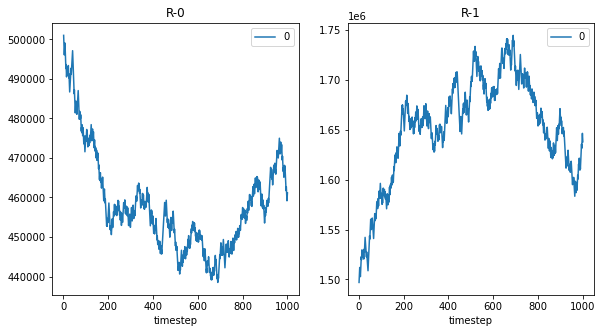

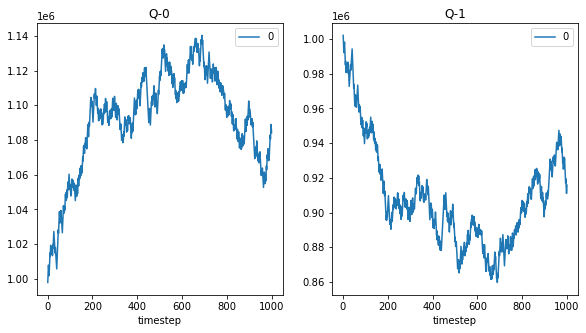

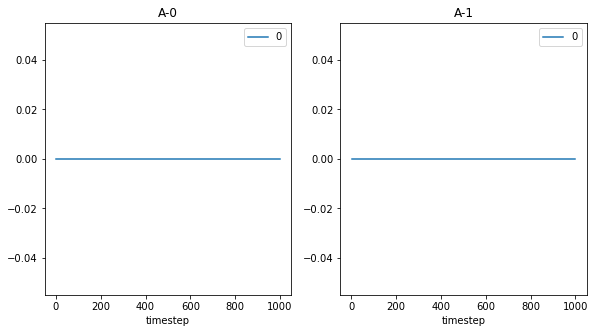

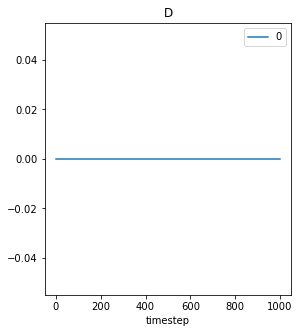

In [2]:

var_list = ['R', 'Q', 'A', 'D']
plot_vars(rdf, var_list)

## Fee Analysis

In [3]:
rdf

,R-0,R-1,Q-0,Q-1,S-0,S-1,A-0,A-1,B-0,B-1,...,token_list-0,token_list-1,fee_assets,fee_HDX,n,simulation,subset,run,substep,timestep
3,501000.00,1497011.95,998003.99,1001996.01,500000,1500000,0.00,0.00,0,1500000,...,R1,R2,0.00,0.00,2,0,0,1,3,1
6,499331.14,1502011.95,1001339.50,998660.50,500000,1500000,0.00,0.00,0,1500000,...,R1,R2,0.00,0.00,2,0,0,1,3,2
9,497684.33,1507011.95,1004652.88,995347.12,500000,1500000,0.00,0.00,0,1500000,...,R1,R2,0.00,0.00,2,0,0,1,3,3
12,496059.13,1512011.95,1007944.35,992055.65,500000,1500000,0.00,0.00,0,1500000,...,R1,R2,0.00,0.00,2,0,0,1,3,4
15,497059.13,1508927.62,1005916.53,994083.47,500000,1500000,0.00,0.00,0,1500000,...,R1,R2,0.00,0.00,2,0,0,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,461509.92,1636483.26,1083400.34,916599.66,500000,1500000,0.00,0.00,0,1500000,...,R1,R2,0.00,0.00,2,0,0,1,3,996
2991,460323.64,1641483.26,1086192.33,913807.67,500000,1500000,0.00,0.00,0,1500000,...,R1,R2,0.00,0.00,2,0,0,1,3,997
2994,459150.59,1646483.26,1088967.35,911032.65,500000,1500000,0.00,0.00,0,1500000,...,R1,R2,0.00,0.00,2,0,0,1,3,998
2997,460150.59,1642217.35,1086600.81,913399.19,500000,1500000,0.00,0.00,0,1500000,...,R1,R2,0.00,0.00,2,0,0,1,3,999


In [4]:
print(rdf.columns)

Index(['R-0', 'R-1', 'Q-0', 'Q-1', 'S-0', 'S-1', 'A-0', 'A-1', 'B-0', 'B-1',
       'D', 'T', 'H', 'token_list-0', 'token_list-1', 'fee_assets', 'fee_HDX',
       'n', 'simulation', 'subset', 'run', 'substep', 'timestep'],
      dtype='object')


In [5]:
print(rdf.keys)

<bound method NDFrame.keys of            R-0        R-1        Q-0        Q-1     S-0      S-1  A-0  A-1  \
3    501000.00 1497011.95  998003.99 1001996.01  500000  1500000 0.00 0.00   
6    499331.14 1502011.95 1001339.50  998660.50  500000  1500000 0.00 0.00   
9    497684.33 1507011.95 1004652.88  995347.12  500000  1500000 0.00 0.00   
12   496059.13 1512011.95 1007944.35  992055.65  500000  1500000 0.00 0.00   
15   497059.13 1508927.62 1005916.53  994083.47  500000  1500000 0.00 0.00   
...        ...        ...        ...        ...     ...      ...  ...  ...   
2988 461509.92 1636483.26 1083400.34  916599.66  500000  1500000 0.00 0.00   
2991 460323.64 1641483.26 1086192.33  913807.67  500000  1500000 0.00 0.00   
2994 459150.59 1646483.26 1088967.35  911032.65  500000  1500000 0.00 0.00   
2997 460150.59 1642217.35 1086600.81  913399.19  500000  1500000 0.00 0.00   
3000 461150.59 1637991.85 1084244.53  915755.47  500000  1500000 0.00 0.00   

      B-0      B-1  ...  token_li

In [16]:
agent_df

,simulation,subset,run,substep,timestep,agent_label,q,s-0,s-1,r-0,r-1,p-0,p-1
6,0,0,1,3,1,Trader,1000000.00,0,0,999000.00,1002988.05,0.00,0
7,0,0,1,3,1,LP1,0.00,500000,0,0.00,0.00,2.00,0
12,0,0,1,3,2,Trader,1000000.00,0,0,1000668.86,997988.05,0.00,0
13,0,0,1,3,2,LP1,0.00,500000,0,0.00,0.00,2.00,0
18,0,0,1,3,3,Trader,1000000.00,0,0,1002315.67,992988.05,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,0,0,1,3,998,LP1,0.00,500000,0,0.00,0.00,2.00,0
5994,0,0,1,3,999,Trader,1000000.00,0,0,1039849.41,857782.65,0.00,0
5995,0,0,1,3,999,LP1,0.00,500000,0,0.00,0.00,2.00,0
6000,0,0,1,3,1000,Trader,1000000.00,0,0,1038849.41,862008.15,0.00,0


In [20]:
agent_df.query('agent_label=="LP1"')

,simulation,subset,run,substep,timestep,agent_label,q,s-0,s-1,r-0,r-1,p-0,p-1
7,0,0,1,3,1,LP1,0.00,500000,0,0.00,0.00,2.00,0
13,0,0,1,3,2,LP1,0.00,500000,0,0.00,0.00,2.00,0
19,0,0,1,3,3,LP1,0.00,500000,0,0.00,0.00,2.00,0
25,0,0,1,3,4,LP1,0.00,500000,0,0.00,0.00,2.00,0
31,0,0,1,3,5,LP1,0.00,500000,0,0.00,0.00,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,0,0,1,3,996,LP1,0.00,500000,0,0.00,0.00,2.00,0
5983,0,0,1,3,997,LP1,0.00,500000,0,0.00,0.00,2.00,0
5989,0,0,1,3,998,LP1,0.00,500000,0,0.00,0.00,2.00,0
5995,0,0,1,3,999,LP1,0.00,500000,0,0.00,0.00,2.00,0


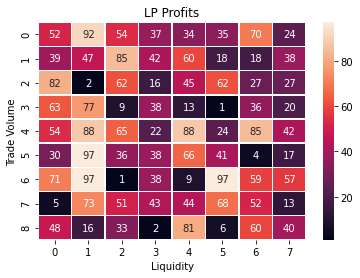

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# set variables & parameters

fee_level = 0.03
# uniform_data = np.random.rand(10, 12)
#trade_volume = {'10': 0.5, '20': 0.6}
#liquidity = {'1000': 0.5, '2000': 0.6}
trade_volume = (50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000)
liquidity = (100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000)

#create matrix for comparison
m=9
n=8
matrix = np.ndarray(shape = (m,n), dtype = int)

# index matrix
#better_index = ["X1", "X2", "Y1", "Y2", "Y3"]
#matrix.index = better_index

# fill in matrix with calculation results
for i in range(len(liquidity)):
    for j in range(len(trade_volume)):
        matrix[j][i] = np.random.randint(1, 100 + 1)




#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix, linewidth=0.5, annot=True, fmt="d")
ax.set_title("LP Profits")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Liquidity')
ax.set_ylabel('Trade Volume')
plt.show()

In [8]:
matrix

array([[52, 92, 54, 37, 34, 35, 70, 24],
       [39, 47, 85, 42, 60, 18, 18, 38],
       [82,  2, 62, 16, 45, 62, 27, 27],
       [63, 77,  9, 38, 13,  1, 36, 20],
       [54, 88, 65, 22, 88, 24, 85, 42],
       [30, 97, 36, 38, 66, 41,  4, 17],
       [71, 97,  1, 38,  9, 97, 59, 57],
       [ 5, 73, 51, 43, 44, 68, 52, 13],
       [48, 16, 33,  2, 81,  6, 60, 40]])

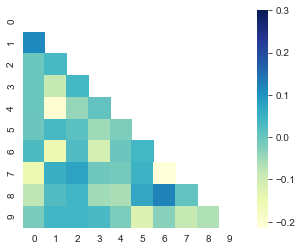

In [9]:
corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,  cmap="YlGnBu")
    plt.show()

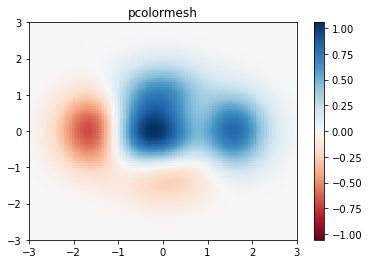

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# generate 2 2d grids for the x & y bounds
y, x = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

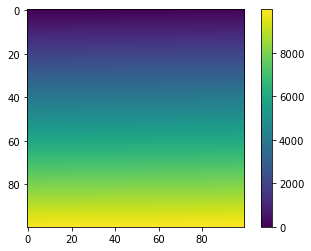

In [11]:
import matplotlib.pyplot as plt
import numpy as np


def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis')
    plt.colorbar()
    plt.show()


test_array = np.arange(100 * 100).reshape(100, 100)
heatmap2d(test_array)

In [12]:
trade_volume

(50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000)